**Introduction**

This dataset consists of tv shows and movies available on Netflix as of 2019.
The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010.
The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.
It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**Problem Statement**

Some of the interesting questions (tasks) which can be performed on this dataset -

Understanding what content is available in different countries
Identifying similar content by matching text-based features
Network analysis of Actors / Directors and find interesting insights
Is Netflix has increasingly focusing on TV rather than movies in recent years.

**About the dataset**

netflix_titles.csv: The csv file contains information about the various movies and the data related to them:

Show ID - unique ID of that particular show.
Type - type of the video - movie, TV Series etc.
Title - title of the video.
Director - director name.
Cast - cast members.
Country - country where it was released.
Data Added - date when it became live on NETFLIX.
Release Year - year of release.
Rating - user rating.
Duration - duration of the movie, TV Series etc.
Listed in - Genre information.
Description - concise plot of the series.

In [1]:
import pandas as pd     # To import pandas
import numpy as np


import seaborn as sns    # To import seaborn

import matplotlib.pyplot as plt      # To import Matplotlib


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Assuming the dataset is stored in a CSV file named 'netflix_titles.csv'
df=pd.read_csv('netflix_titles.csv')  

In [3]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


**DATA CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We can clearly see that there are few columns which have null values

In [5]:
# Checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Observation: The missing values are in there.


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Observation: As I already assumed, all the show IDs and Titles are unique whereas others might have been repeated once or more times!

In [8]:
# fill the null values with unknown non null values.
df['director'].fillna("unknown",inplace=True)


In [9]:
# checking the null values is present in director column or not..
df['director'].isnull().value_counts()

director
False    8807
Name: count, dtype: int64

Observation: All the missing values in the director column have been fixed!

In [10]:
# droping the cust column..
df.drop(['cast'], inplace=True, axis=1)
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

here drop the cust cilumn

In [11]:
# checkin whwre the null value is present in rating column..
df[df["rating"].isnull()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unknown,NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,unknown,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,unknown,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [12]:
# filling the null values wuth the non null values..
df['rating'].fillna("TV-MA",inplace=True)
    
df['rating'].isnull().sum()

0

In [13]:
df[df["rating"].isnull()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description


Observation: All the missing values in the ratings column have been fixed!

In [14]:
# checkin whwre the null value is present in duration column..
df[df["duration"].isnull()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [15]:
# filling the null values wuth the non null values..
df['duration'].fillna("100 min",inplace=True)
    
df['duration'].isnull().sum()

0

In [16]:
df[df["duration"].isnull()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description


Observation: All the missing values in the ratings column have been fixed!

In [17]:
# Checking null values
df.isnull().sum()

show_id           0
type              0
title             0
director          0
country         831
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [18]:
#fill the null values with any not null values.
df=df[df["date_added"].notna()]

Observation: We have null values left only in the 'country' column. Let's try to fix it with the value which occurs the most number of times i.e. MODE

In [19]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [20]:
df['country'].nunique()

748

Observation: When looked upon the 'country' column closely, we see that there are some entry where it has multiple values. so I think I will add a new column with just the first one so we can check which regions have more productions

In [21]:
# Checking null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**DATA ANALYSIS**

In [22]:
# Lets retrieve just the first country
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

In [23]:
# convert date added to year
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head() #showing the result

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [24]:
# convert date added to month
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
 #showing the result
df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [25]:
#meaning of every unique values.
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings_ages)
# showing all the unique values
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min'], dtype=object)

Observation: This looks so much more clear. Using the target_ages column we can easily make out the intended audiance for a particular movie!

In [40]:
#df[(df['type']=='Movie')&(df['release_year']==2019)]

In [41]:
#df[(df['type']=='TV Show')&(df['release_year']==2019)]

In [42]:
#df[(df['type']=='TV Show')&(df['country']=='India')]

In [43]:
#df[(df['type']=='TV Show')&(df['country']=='India')]


**Now let us try doing some pictorial representaion of our dataset**

<Axes: xlabel='count', ylabel='type'>

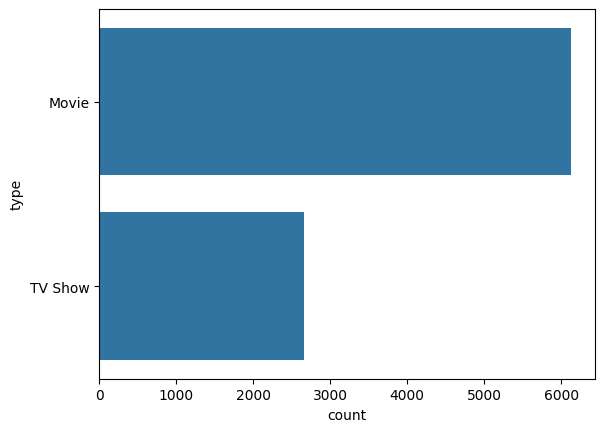

In [30]:
sns.countplot(df['type'])

Observation: There are almost half the number of TV Shows than there are Movies on Netflix

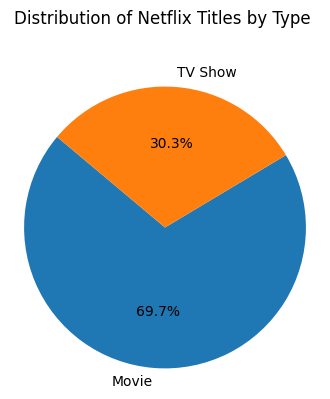

In [31]:
types_count = df['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(4,4))  # Set the figure size
plt.pie(types_count, labels=types_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Netflix Titles by Type \n\n')  # Add a title to the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

Observation: Nearly 2/3rd of the content on netflix are movies while the rest are TV Show

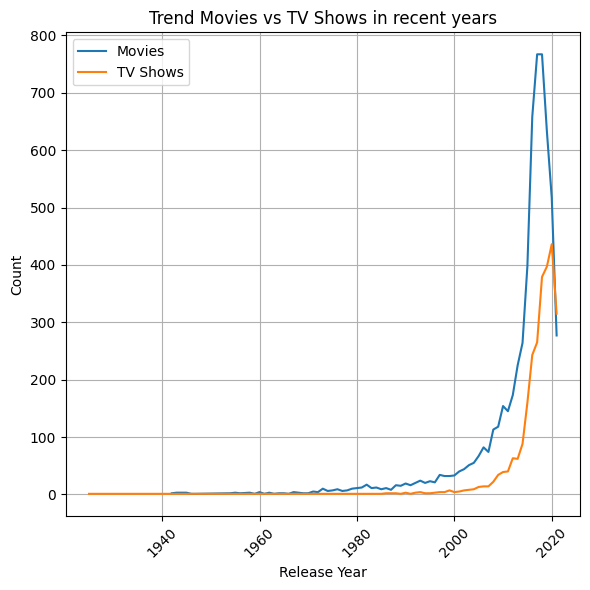

In [32]:
# Filter the DataFrame for movies and TV shows separately
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']
# Count the occurrences of release years for movies and TV shows
movies_by_year = movies['release_year'].value_counts().sort_index()
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()
# Plotting the line chart
plt.figure(figsize=(6, 6))
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies')
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='TV Shows')

plt.title('Trend Movies vs TV Shows in recent years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility

plt.tight_layout()
plt.show()

**Observation:** Here we can see that the number of movies are highest in year of 2019 and highest number of tv shows in 2020.

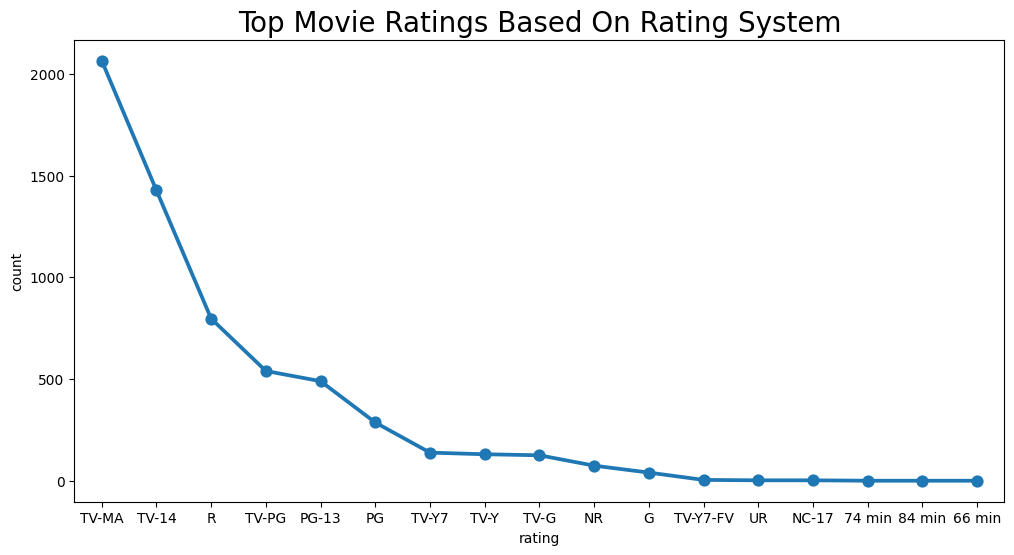

In [33]:
df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

**Observation:** The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

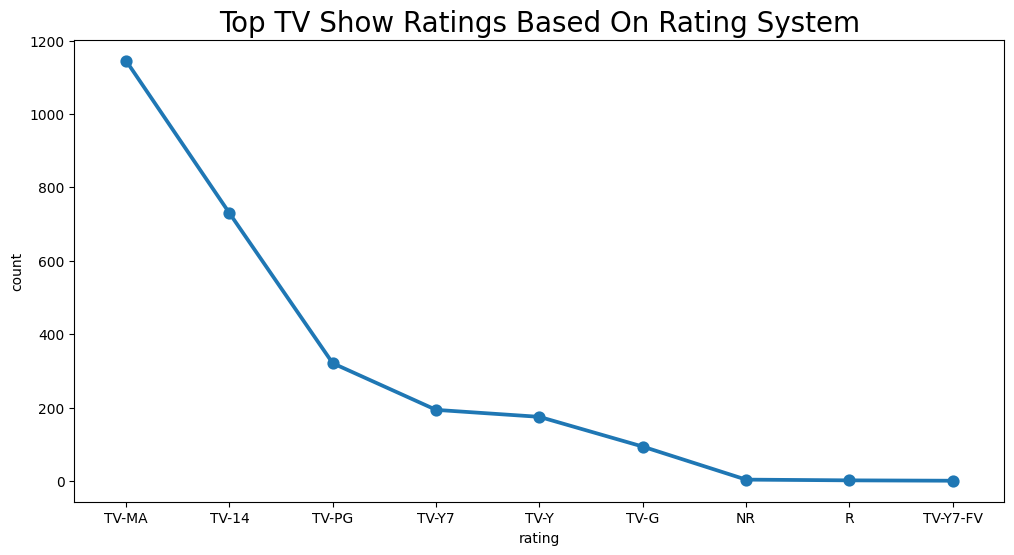

In [34]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

**Observation:** here is the result.

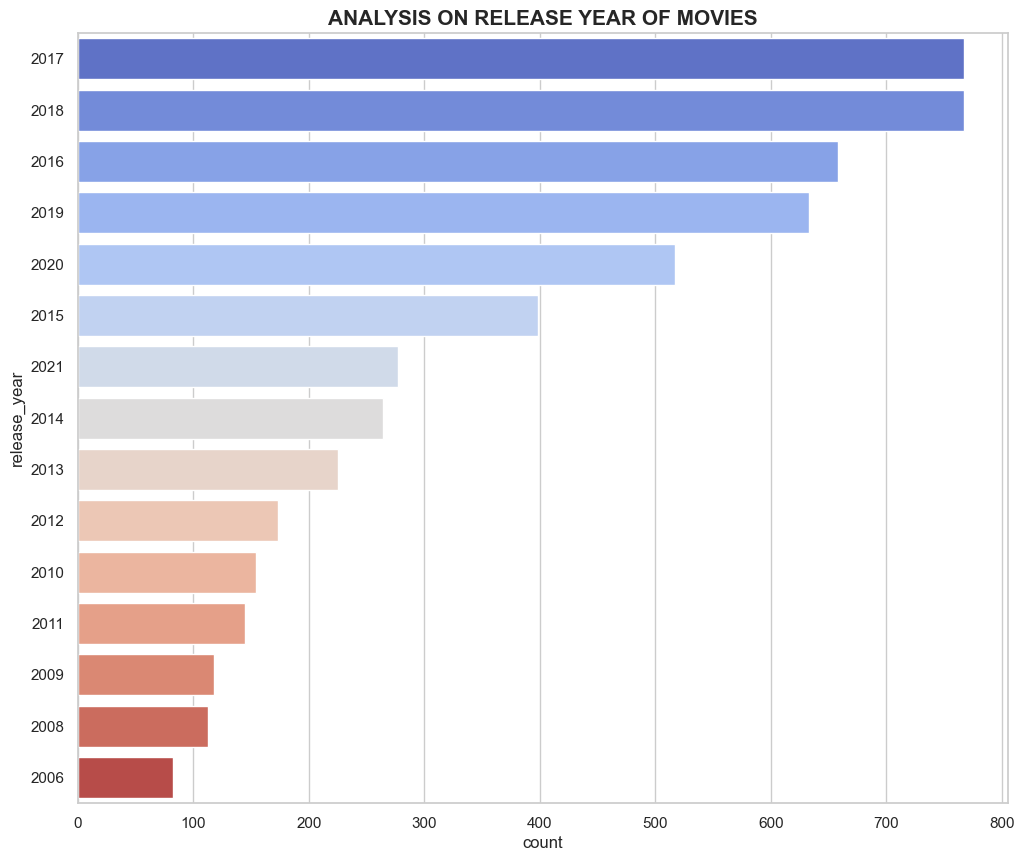

In [35]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_movie, palette="coolwarm", order=df_movie['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

Observation: Most of the movies were released in the year 2017 followed by 2018 and 2016.

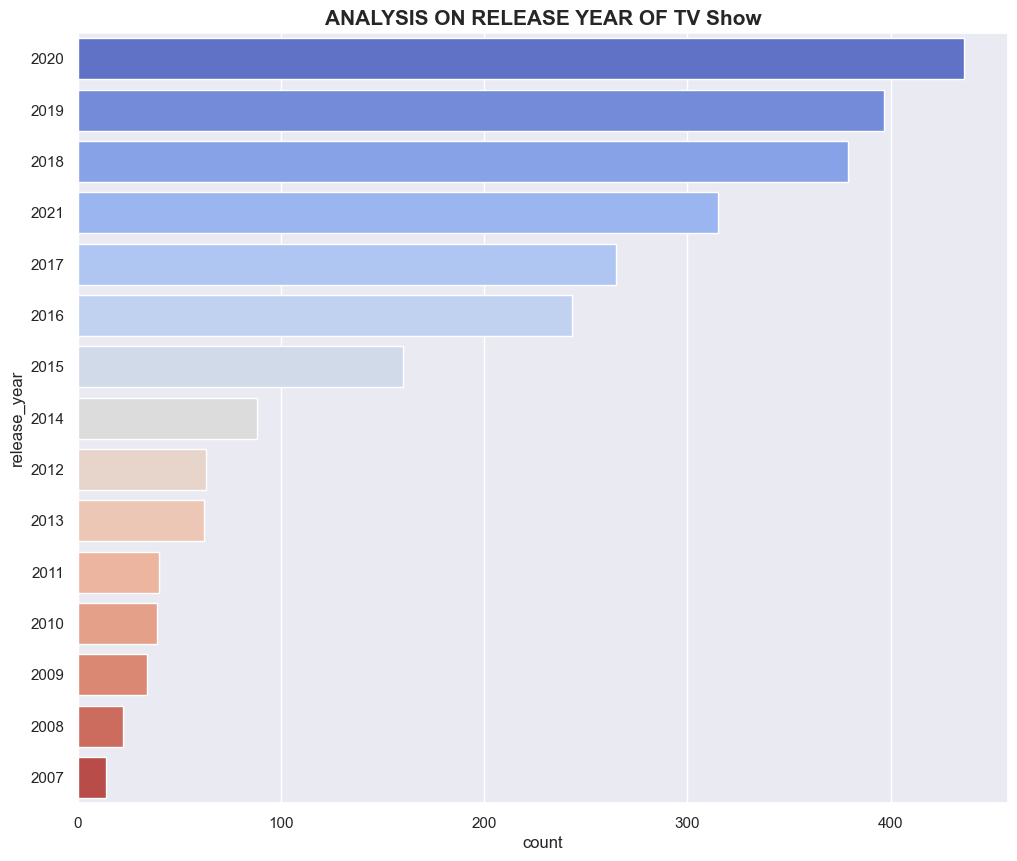

In [36]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

**Observation:** Most of the TV Shows were released in 2020 followed by 2019 and 2018

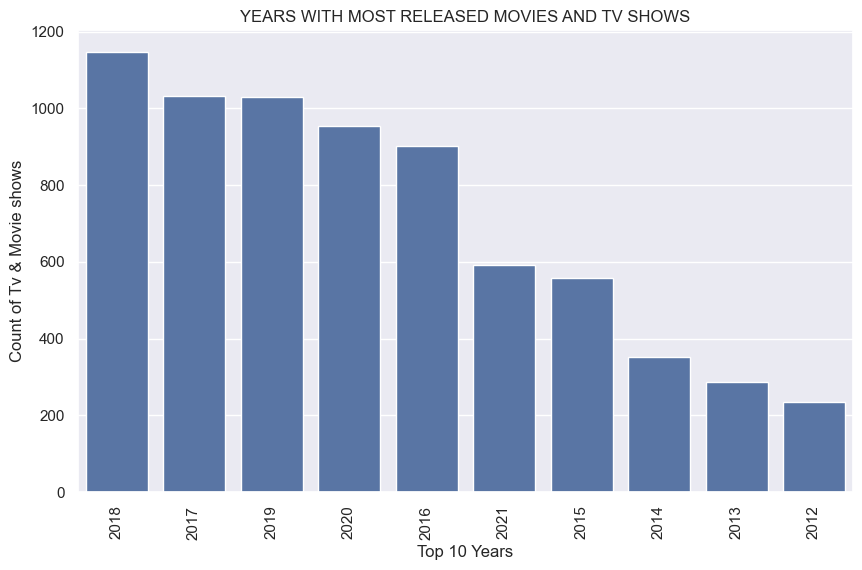

In [37]:
top_10_year=df['release_year'].value_counts().sort_values(ascending=False).iloc[:10]
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['release_year'].isin(top_10_year.index)],x='release_year',order=top_10_year.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Years')
plt.ylabel('Count of Tv & Movie shows')
plt.title('YEARS WITH MOST RELEASED MOVIES AND TV SHOWS')
plt.show()

**Observation:**

The majority of films and television series on Netflix have been released in the more recent years spanning from 2016 to 2021.

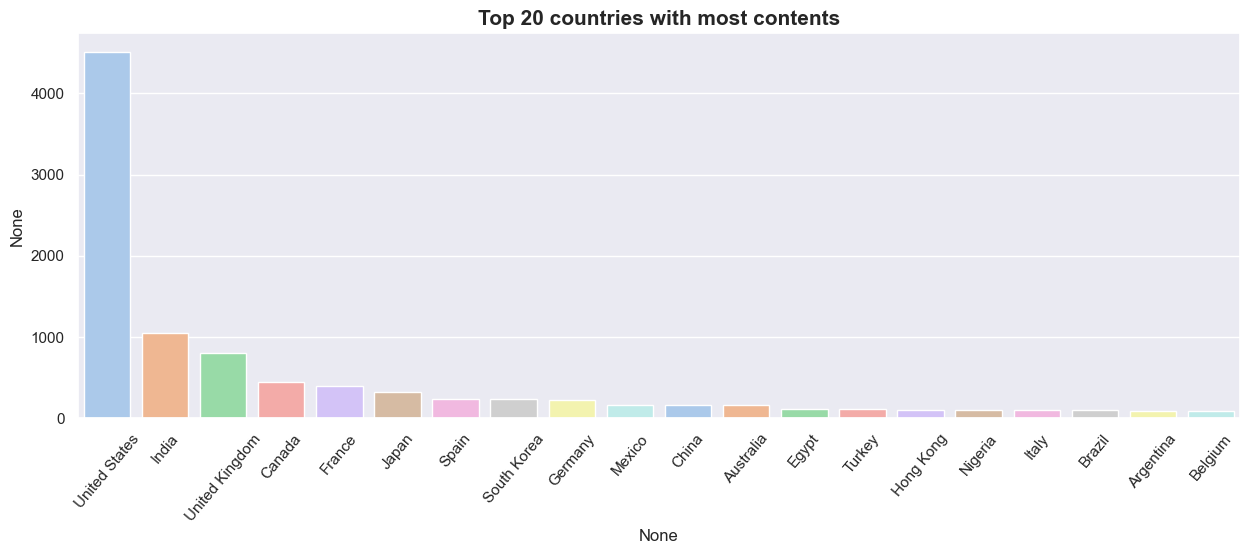

In [38]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

**Observation:** Netflix is more popular in the US and India and Argentina and Belgium has the lowest.

In [39]:
# Convert 'year_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Filter the DataFrame for movies and TV shows separately
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Count the occurrences of 'year_added' for movies and TV shows
movies_by_year = movies['date_added'].dt.year.value_counts().sort_index()
tv_shows_by_year = tv_shows['date_added'].dt.year.value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(6, 6))
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies')
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='TV Shows')

plt.title('Number of Movies and TV Shows Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility

plt.tight_layout()
plt.show()

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
**Observation:** 

In [44]:
# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the month from the 'date_added' column
df['release_month'] = df['date_added'].dt.month_name()

# Filter the DataFrame for movies and TV shows separately
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Count the occurrences of release months for movies and TV shows
movies_by_month = movies['release_month'].value_counts().sort_index()
tv_shows_by_month = tv_shows['release_month'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(6, 6))
plt.plot(movies_by_month.index, movies_by_month.values, label='Movies')
#plt.plot(tv_shows_by_month.index, tv_shows_by_month.values, label='TV Shows')

plt.title('Number of Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility

plt.tight_layout()
plt.show()

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the month from the 'date_added' column
df['release_month'] = df['date_added'].dt.month_name()

# Filter the DataFrame for movies and TV shows separately
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Count the occurrences of release months for movies and TV shows
movies_by_month = movies['release_month'].value_counts().sort_index()
tv_shows_by_month = tv_shows['release_month'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(6, 6))
#plt.plot(movies_by_month.index, movies_by_month.values, label='Movies')
plt.plot(tv_shows_by_month.index, tv_shows_by_month.values, label='TV Shows')

plt.title('Number of TV Shows Released by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [46]:
df.corr()

ValueError: could not convert string to float: 's1'

In [45]:
# creating a pivot table on rating and duration
pd.pivot_table(df, values='duration', index='rating', aggfunc='count')

,duration
rating,
66 min,1
74 min,1
84 min,1
G,41
NC-17,3
NR,79
PG,287
PG-13,490
R,799


Insights :

The dataset indicates a diverse range of Netflix content durations, with a majority falling within the typical movie length categories (e.g., 66 min, 74 min, 84 min). The prevalence of TV-MA, PG-13, and R ratings suggests a broad spectrum of mature and diverse content, catering to varied audience preferences and age groups.

In [47]:
pd.pivot_table(df, values='rating', index='duration', aggfunc='count')

,rating
duration,
1 Season,1793
10 Seasons,6
10 min,1
100 min,111
101 min,116
...,...
95 min,137
96 min,130
97 min,146


**Conclusion:**

The following conclusions can be drawn from the Netflix data analysis:


1.Netflix is more popular in the US and India.


2.The amount of movies and shows added by Netflix has been increasing significantly after 2013.


3.Netflix releases more movies than shows.


4.Netflix keeps releasing content throughout the year, with December and July having the majority of releases of tv shows.
april,december,july and october mejority of releses movies.


5.Netflix has added old shows from early 1925 and 1960 as well.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['listed_in'])

plt.rcParams['figure.figsize'] = (6,6)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()